# Digit recognition in Machine Learning


## Desription

The MNSIT dataset is composed of a set of 42 000 images for trainging with a resolution of 28x28x1 in grayscale.

## Load data


In [19]:
import pandas as pd

df_train = pd.read_csv("Datasets/train.csv")
y = df_train["label"]
X = df_train.drop("label", axis=1)

In [20]:
# df_test = pd.read_csv("Datasets/test.csv")
# y_test = []  # Empty no labels for test data
# X_test = df_test

## Split data

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Show images info

In [22]:
print(df_train.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


## Plot images

Plot images as BW with reverse BW.

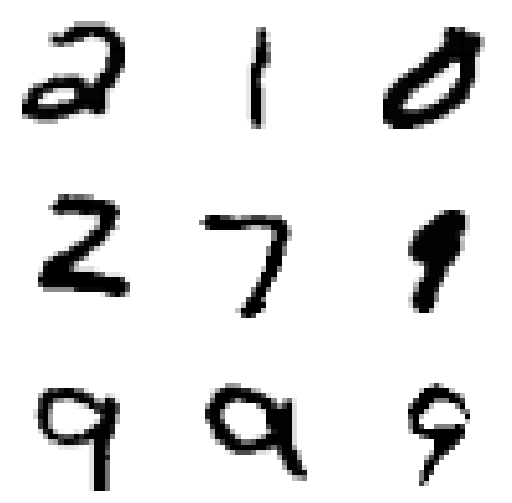

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 9))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train.iloc[i, 0:].values.reshape(28, 28), cmap=plt.cm.gray_r)
    plt.axis("off")
plt.show()

## Images processing

In [25]:
from sklearn.preprocessing import MinMaxScaler

### Feature scaling
## Rescale to -1,+1 in our case 0,+1 because we only have positive pixels' value:
scale = MinMaxScaler()

# fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data.
X_train = scale.fit_transform(X_train)

# Using the transform method we can use the same mean and variance as it is calculated from our training data to transform our test data.
X_test = scale.transform(X_test)


### OR

### Image binarize
# Convert the image to BW or keep them as grayscale, because grayscale doesn't add any information.


## Data augmentation

## PCA

No use in supervised here.

## Hyper-parameters tuning

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

grid_params = {'n_neighbors': [i for i in range(1, 11)], 'weights': ["uniform", "distance"]}
# grid_params = {'n_neighbors': [i for i in range(1, 11)], 'weights': ["uniform", "distance"]}

gsCV = GridSearchCV(knn, grid_params, verbose=3)

## Hyper parameter tuning

In [27]:
print(gsCV.fit(X_train, y_train))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.963 total time=   5.0s
[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.969 total time=   3.6s
[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.962 total time=   3.2s
[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.964 total time=   3.3s
[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=0.962 total time=   3.2s
[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.963 total time=   3.3s
[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.969 total time=   3.0s
[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.962 total time=   3.0s
[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.964 total time=   3.2s
[CV 5/5] END ...n_neighbors=1, weights=distance;, score=0.962 total time=   3.2s
[CV 1/5] END ....n_neighbors=2, weights=uniform;, score=0.954 total time=   4.3s
[CV 2/5] END ....n_neighbors=2, weights=uniform

## Choose best model

In [28]:
print(gsCV.best_params_)

{'n_neighbors': 4, 'weights': 'distance'}


In [29]:
print(gsCV.best_score_)

0.9674404761904762


In [30]:
knn = gsCV.best_estimator_

## Train and test chosen model

In [31]:
# Fit
print(knn.fit(X_train, y_train))

KNeighborsClassifier(n_neighbors=4, weights='distance')


In [32]:
# Predict
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

## Results

In [33]:
from sklearn.metrics import accuracy_score


# Accuracies
def print_scores(y_train, y_test, y_pred_train, y_pred_test):
    print(f"Train accuracy: {accuracy_score(y_train, y_pred_train)}.")
    print(f"Test accuracy: {accuracy_score(y_test, y_pred_test)}.")


print_scores(y_train, y_test, y_pred_train, y_pred_test)

Train accuracy: 1.0.
Test accuracy: 0.9683333333333334.


In [34]:
# from sklearn.model_selection import cross_val_score
#
# def print_cross_val_score(model, X, y):
#     cross_val_score(model, X, y, cv=5, scoring='roc_auc')

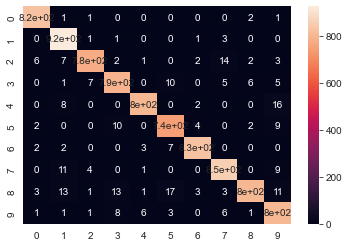

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Confusion matrix
def print_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True)
    plt.show()


print_confusion_matrix(y_test, y_pred_test)

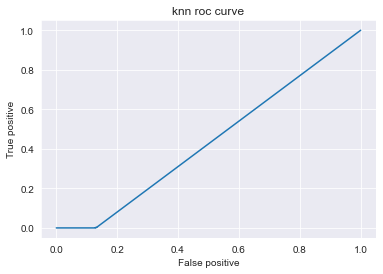

In [36]:
from sklearn.metrics import roc_curve

# ROC curve
def print_roc_curve(model, X_test, y_test, name, title):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob , pos_label=9)
    plt.plot(fpr, tpr, label=name)
    plt.xlabel("False positive")
    plt.ylabel("True positive")
    plt.title(title)
    plt.show()

print_roc_curve(knn, X_test, y_test, "KNeighborsClassifier", "knn roc curve")

## Test of other models

Train accuracy: 1.0.
Test accuracy: 0.963452380952381.


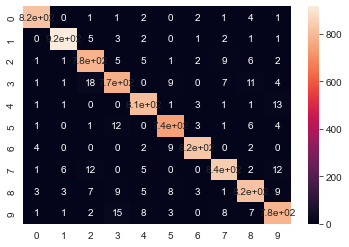

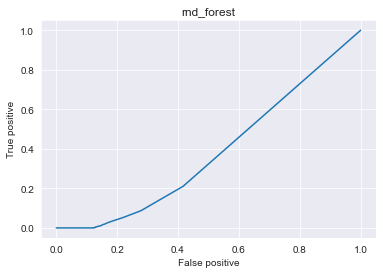

In [37]:
from sklearn.ensemble import RandomForestClassifier

# grid_params = {'n_neighbors': [i for i in range(1, 11)], 'weights': ["uniform", "distance"]}
# gsCV = GridSearchCV(rnd_forest, grid_params, verbose=3)

rnd_forest = RandomForestClassifier()

rnd_forest.fit(X_train, y_train)

y_pred_train = rnd_forest.predict(X_train)
y_pred_test = rnd_forest.predict(X_test)

print_scores(y_train, y_test, y_pred_train, y_pred_test)
print_confusion_matrix(y_test, y_pred_test)
print_roc_curve(rnd_forest, X_test, y_test, "RandomForestClassifier", "rnd_forest")

Train accuracy: 0.9889880952380953.
Test accuracy: 0.974047619047619.


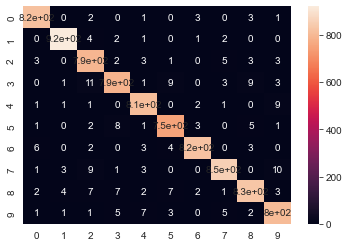

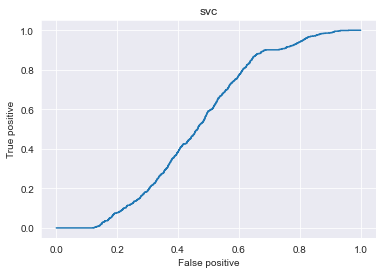

In [39]:
from sklearn import svm

svc = svm.SVC(probability=True)

# grid_params = {'n_neighbors': [i for i in range(1, 11)], 'weights': ["uniform", "distance"]}
# gsCV = GridSearchCV(rnd_forest, grid_params, verbose=3)

svc.fit(X_train, y_train)

y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

print_scores(y_train, y_test, y_pred_train, y_pred_test)
print_confusion_matrix(y_test, y_pred_test)
print_roc_curve(svc, X_test, y_test, "svm", "svc")

Train accuracy: 1.0.
Test accuracy: 0.8530952380952381.


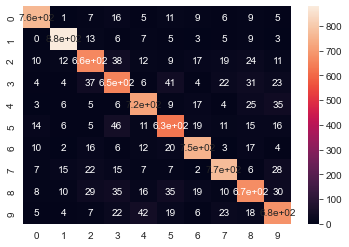

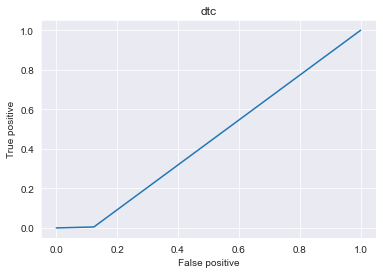

In [40]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)

print_scores(y_train, y_test, y_pred_train, y_pred_test)
print_confusion_matrix(y_test, y_pred_test)
print_roc_curve(dtc, X_test, y_test, "DecisionTreeClassifier", "dtc")


Train accuracy: 0.5503869047619048.
Test accuracy: 0.5454761904761904.


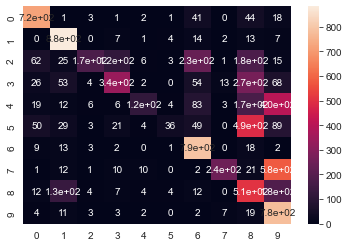

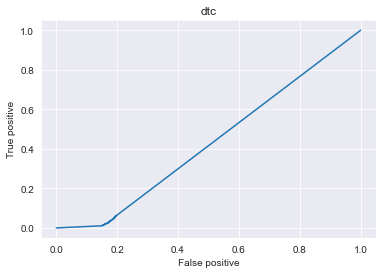

In [41]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)

print_scores(y_train, y_test, y_pred_train, y_pred_test)
print_confusion_matrix(y_test, y_pred_test)
print_roc_curve(gnb, X_test, y_test, "DecisionTreeClassifier", "dtc")

## Voting Classifier

Train accuracy: 1.0.
Test accuracy: 0.974047619047619.


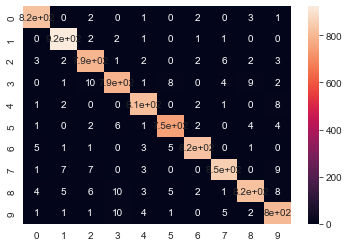

Train accuracy: 1.0.
Test accuracy: 0.9748809523809524.


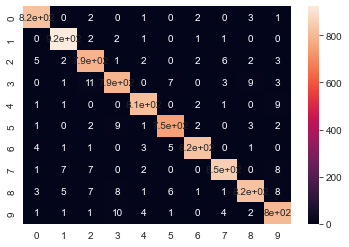

Train accuracy: 1.0.
Test accuracy: 0.9736904761904762.


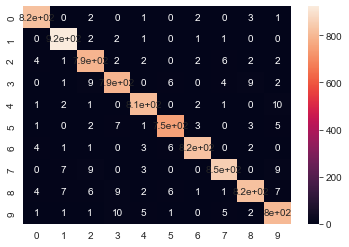

In [45]:
from sklearn.ensemble import VotingClassifier

knn = KNeighborsClassifier(n_neighbors=4,weights='distance')
svc = svm.SVC()
rnd_forest = RandomForestClassifier()

vclf = VotingClassifier(estimators=[('knn', knn), ('svc', svc), ('rnd_forest', rnd_forest)], voting='hard')
vclf.fit(X_train, y_train)

y_pred_test = vclf.predict(X_test)
y_pred_train = vclf.predict(X_train)

print_scores(y_train, y_test, y_pred_train, y_pred_test)
print_confusion_matrix(y_test, y_pred_test)
# print_roc_curve(vclf, X_test, y_test, "VotingClassifier", "votingClassifier")

## Bagging

In [46]:
# from sklearn.ensemble import BaggingClassifier
#
# bclf = BaggingClassifier()
#
# bclf.fit(X_train, y_train)
#
# y_pred_train = bclf.predict(X_train)
# y_pred_test = bclf.predict(X_test)
#
# print_scores(y_train, y_test, y_pred_train, y_pred_test)
# print_confusion_matrix(y_test, y_pred_test)
# print_roc_curve(X_test, y_test, "DecisionTreeClassifier", "dtc")


## Random Forest

## Boosting

## Stacked models

C:\Users\Quentin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train accuracy: 1.0.
Test accuracy: 0.9772619047619048.


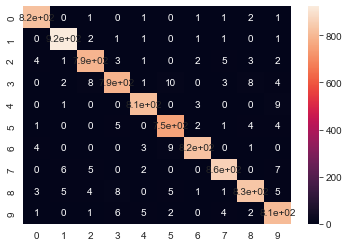

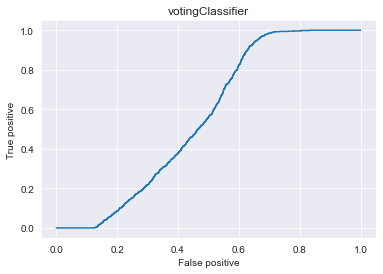

In [47]:
from sklearn.ensemble import StackingClassifier

knn = KNeighborsClassifier(n_neighbors=4,weights='distance')
# svc = svm.SVC(max_iter=100)
svc = svm.SVC()
rnd_forest = RandomForestClassifier()

sclf = StackingClassifier(estimators=[('knn', knn), ('svc', svc), ('rnd_forest', rnd_forest)])

sclf.fit(X_train, y_train)

y_pred_test = sclf.predict(X_test)
y_pred_train = sclf.predict(X_train)

print_scores(y_train, y_test, y_pred_train, y_pred_test)
print_confusion_matrix(y_test, y_pred_test)
print_roc_curve(sclf, X_test, y_test, "VotingClassifier", "votingClassifier")

## Conclusion